In [1]:
import numpy as np
from scipy.optimize import curve_fit
# curve-fitting(최적화)를 수행하는 함수

import matplotlib.pyplot as plt
# 데이터 시각화용 라이브러리리

In [2]:
def my_fcn(x, a, b):
  return a * np.sin(b * x)
# a * sin(b * x) 형태의 함수를 정의
# 이 함수는 x 값에 대해 a와 b를 조정하여 적절한 곡선을 피팅하는 데 사용됨

Dataset $(x_k,y_k)$ generation

In [3]:
np.random.seed(10)
# 마찬가지로 난수를 예측 가능하도록 만들어주는 역할

x = np.linspace(0, 4, 100)
# 0에서 4까지 100개의 균등한 간격의 x값을 생성
y = 3*np.sin(2*x) + np.random.normal(0, 0.2, size=x.shape)
# 3*sin(2*x)을 기본 함수로 설정
# 평균 0, 표준편차 0.2의 노이즈를 더함

In [4]:
print(x[:5])
print(y[:5])
# x와 y의 처음 5개 값을 출력하여 생성된 데이터 확인

[0.         0.04040404 0.08080808 0.12121212 0.16161616]
[0.2663173  0.38521629 0.17366049 0.71849328 1.07716664]


In [5]:
params, covariance = curve_fit(my_fcn, x, y, p0=[1,1], maxfev = 1000)
# default optimizer: Levenberg-Marquardt
# maxfev (Maximum Function Evaluations)
# curve_fit()을 사용해 my_fcn(x, a, b) = a * sin(b * x)의 최적의 a, b를 찾음
# p0=[1,1] → 초기 추정값을 a=1, b=1로 설정
# maxfev=1000 → 최대 1000번의 반복 연산을 수행하여 최적값을 찾음
# params → 최적의 a, b 값을 반환
# covariance → 최적화된 파라미터의 공분산 행렬을 반환

In [6]:
# extract parameter estimates
a_fit, b_fit = params
print(f"Fitted parameters: a = {a_fit:.4f}, b = {b_fit:.4f}")
# 피팅된 a, b 값을 출력

# calculate curve with the estimates
y_fit = my_fcn(x, *params)
# params에서 얻은 a_fit, b_fit 값을 사용하여 y_fit = a_fit * sin(b_fit * x) 계산

Fitted parameters: a = -0.4957, b = 0.9579


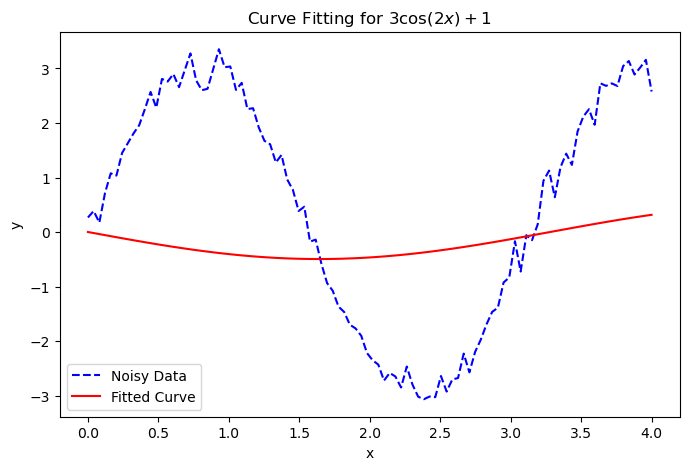

In [7]:
# Visualize the graph
plt.figure(figsize=(8, 5))
# 그래프 크기를 설정
plt.plot(x, y, label="Noisy Data", linestyle="dashed", color="blue")
# 실제 데이터(노이즈 포함)를 파란색 점선으로 그림
plt.plot(x, y_fit, label="Fitted Curve", linestyle="solid", color="red")
# 피팅된 곡선을 빨간색 실선으로 그림
plt.xlabel("x")
plt.ylabel("y")
# 축 레이블 설정
plt.legend()
# 범례 추가
plt.title("Curve Fitting for $3\cos(2x) + 1$")
plt.show()
# 그래프 출력

In [8]:
def E2Loss(x,y,beta):
  return np.sqrt(np.sum((y-beta[0]*np.sin(beta[1]*x))**2))
# 특정한 β0, β1을 사용하여 오차를 계산
# 오차는 유클리드 거리의 제곱합을 루트 씌운 값 사용

In [9]:
# β0, β1 ranges
beta0_range = np.linspace(-1, 4, 100)  # β0 range
beta1_range = np.linspace(-1, 4, 100)  # β1 range
# β0, β1 값을 -1에서 4까지 100개 생성

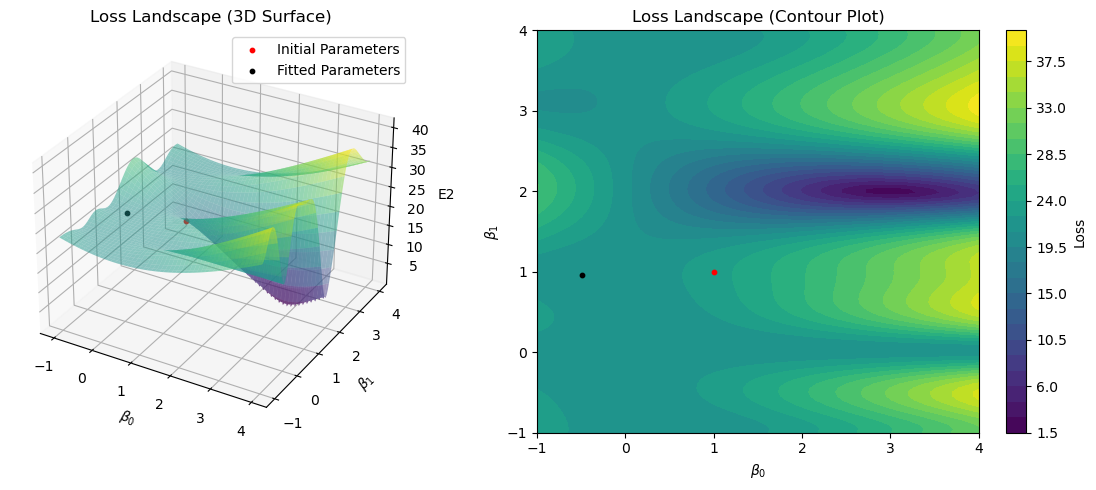

In [10]:
# Save loss values (matrix)
loss_values = np.zeros((len(beta0_range), len(beta1_range)))
# loss_values → (100, 100) 크기의 0으로 초기화된 손실 값 저장 배열

# Calculate E2 values for all possible (β0, β1) combinations
for i, beta0 in enumerate(beta0_range):
    for j, beta1 in enumerate(beta1_range):
        loss_values[i, j] = E2Loss(x, y, [beta0, beta1])
# β0, β1의 조합마다 E2Loss 값을 계산하여 loss_values에 저장

# Generate meshgrid
B0, B1 = np.meshgrid(beta0_range, beta1_range)
# np.meshgrid()를 이용해 β0, β1 좌표 격자를 생성

# --- 3D Surface Plot ---
fig = plt.figure(figsize=(12, 5))
# 그래프 크기 설정

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(1, 1, E2Loss(x,y,[1,1]), color='red', s=10, label="Initial Parameters")
# 초기값(빨간 점)과 피팅된 값(검은 점)을 표시
ax1.scatter(a_fit, b_fit, E2Loss(x,y,[a_fit,b_fit]), color='black', s=10, label="Fitted Parameters")

ax1.plot_surface(B0, B1, loss_values.T, cmap='viridis', edgecolor='none', alpha=0.5)
# β0, β1에 대한 손실값을 3D 서피스 그래프로 그림

ax1.legend()
ax1.set_xlabel(r'$\beta_0$')
ax1.set_ylabel(r'$\beta_1$')
ax1.set_zlabel('E2')
# 축 레이블 설정
ax1.set_title('Loss Landscape (3D Surface)')
# 제목 설정

# --- Contour Plot ---
ax2 = fig.add_subplot(122)
contour = ax2.contourf(B0, B1, loss_values.T, levels=30, cmap='viridis')
# 등고선 그래프를 생성
fig.colorbar(contour, ax=ax2, label="Loss")
# 색상 바 추가
ax2.scatter(1, 1, color='red', s=10, label="Initial Parameters")
ax2.scatter(a_fit, b_fit, color='black', s=10, label="Fitted Parameters")
# 초기값과 피팅된 값 표시
ax2.set_xlabel(r'$\beta_0$')
ax2.set_ylabel(r'$\beta_1$')
ax2.set_title('Loss Landscape (Contour Plot)')

plt.tight_layout()
plt.show()
# 레이아웃 정리 후 그래프 출력